### 2021 Spring "EE479: Scientific Computing & Data"
#### Dr. J. Park, KAIST Electrical Engineering
#### Brunton&Kutz 6.6 Neural Networks for Dynamical Systems
#### 2021. 05. 18 Revised from matlab version

#### Machine Learning for Lorenz Attractor
#### Lorenz equation:
$$\frac{dx}{dt} = \sigma(y-x)$$
$$\frac{dy}{dt} = x(\rho-z) - y$$
$$\frac{dz}{dt} = xy - \beta z$$
Obtain dataset -> Train data -> MD with ML model, Brunton & Kutz Ch6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#from tensorflow import keras
import keras
from keras import layers
from sklearn.model_selection import train_test_split

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K

In [4]:
rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

### Make database for Lorenz equation
#### 100 trajectory in fig 6.14

(801,)


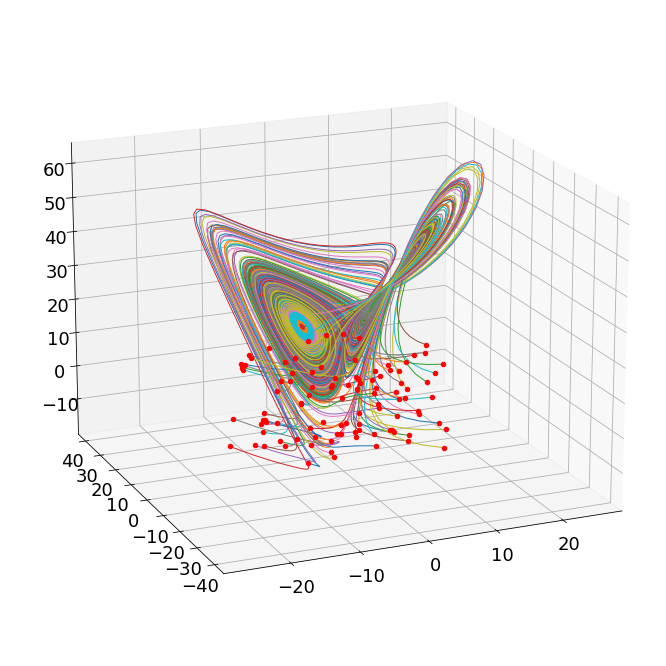

In [5]:
dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28

print(t.shape)

nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

### Train data by neural network model

In [6]:
deep_approx = keras.models.Sequential()
deep_approx.add(layers.Dense(10, input_dim=3, activation='sigmoid'))
deep_approx.add(layers.Dense(10, activation='relu'))
deep_approx.add(layers.Dense(3, activation='linear'))

deep_approx.compile(loss='mse', optimizer='adam')

History = deep_approx.fit(nn_input, nn_output, epochs=1000)

Epoch 1/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 34.4625
Epoch 2/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 1.7387
Epoch 3/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.7514
Epoch 4/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4782
Epoch 5/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.3413
Epoch 6/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2594
Epoch 7/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2067
Epoch 8/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1657
Epoch 9/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1335
Epoch 10/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1102
Epoch 11/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0920
Epoch 12/1000
2500/2500 [==============================] - 3s 

2500/2500 [==============================] - 3s 1ms/step - loss: 0.0068
Epoch 97/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0066
Epoch 98/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0067
Epoch 99/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0066
Epoch 100/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0068
Epoch 101/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0064
Epoch 102/1000
2500/2500 [==============================] - 2s 970us/step - loss: 0.0065
Epoch 103/1000
2500/2500 [==============================] - 2s 836us/step - loss: 0.0068
Epoch 104/1000
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0063
Epoch 105/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0065
Epoch 106/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0064
Epoch 107/1000
2500/2500 [==============================]

2500/2500 [==============================] - 3s 1ms/step - loss: 0.0046
Epoch 191/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0049
Epoch 192/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0050
Epoch 193/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0047
Epoch 194/1000
2500/2500 [==============================] - 2s 973us/step - loss: 0.0050
Epoch 195/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0047
Epoch 196/1000
2500/2500 [==============================] - 2s 974us/step - loss: 0.0049
Epoch 197/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0048
Epoch 198/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0051
Epoch 199/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0048
Epoch 200/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0049
Epoch 201/1000
2500/2500 [============================

2500/2500 [==============================] - 4s 2ms/step - loss: 0.0046
Epoch 285/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0046
Epoch 286/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0045
Epoch 287/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0045
Epoch 288/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0046
Epoch 289/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0045
Epoch 290/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0045
Epoch 291/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0046
Epoch 292/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0044
Epoch 293/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0044
Epoch 294/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 295/1000
2500/2500 [==============================] 

2500/2500 [==============================] - 4s 1ms/step - loss: 0.0044
Epoch 379/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0043
Epoch 380/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0043
Epoch 381/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0043
Epoch 382/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0041A: 1s
Epoch 383/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0040
Epoch 384/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0045
Epoch 385/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0039
Epoch 386/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0041
Epoch 387/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0042
Epoch 388/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0041
Epoch 389/1000
2500/2500 [===========================

2500/2500 [==============================] - 4s 1ms/step - loss: 0.0039
Epoch 472/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0040
Epoch 473/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0039
Epoch 474/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0038
Epoch 475/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0041
Epoch 476/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0038
Epoch 477/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0039
Epoch 478/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 479/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0041
Epoch 480/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 481/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0039
Epoch 482/1000
2500/2500 [==============================] 

2500/2500 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 566/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0040
Epoch 567/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0037
Epoch 568/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0039
Epoch 569/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0037
Epoch 570/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0040
Epoch 571/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0036
Epoch 572/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0040
Epoch 573/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0038
Epoch 574/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0040
Epoch 575/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0036
Epoch 576/1000
2500/2500 [==============================] 

2500/2500 [==============================] - 3s 1ms/step - loss: 0.0037
Epoch 660/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0038
Epoch 661/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0036
Epoch 662/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0038
Epoch 663/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0039
Epoch 664/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 665/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0039
Epoch 666/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0037
Epoch 667/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0035
Epoch 668/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0041
Epoch 669/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0035
Epoch 670/1000
2500/2500 [==============================] 

2500/2500 [==============================] - 3s 1ms/step - loss: 0.0037
Epoch 754/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0036
Epoch 755/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0037
Epoch 756/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0035
Epoch 757/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0040
Epoch 758/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0037
Epoch 759/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0036
Epoch 760/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 761/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0036
Epoch 762/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0036
Epoch 763/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0038
Epoch 764/1000
2500/2500 [==============================] 

2500/2500 [==============================] - 4s 1ms/step - loss: 0.0036
Epoch 848/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0035
Epoch 849/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0036
Epoch 850/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0034
Epoch 851/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0036
Epoch 852/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0035
Epoch 853/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0038
Epoch 854/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0036
Epoch 855/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0035
Epoch 856/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0036
Epoch 857/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0037
Epoch 858/1000
2500/2500 [==============================] 

2500/2500 [==============================] - 3s 1ms/step - loss: 0.0036
Epoch 942/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0034
Epoch 943/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0034
Epoch 944/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0036
Epoch 945/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0034
Epoch 946/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0036
Epoch 947/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0036
Epoch 948/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0037
Epoch 949/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0034
Epoch 950/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0033
Epoch 951/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0035
Epoch 952/1000
2500/2500 [==============================] 

### save or load keras NN model

In [7]:
model_selection = 'load'  # load, save, None
fname = "NNloss0034.keras"      # modify keras model name
if model_selection == 'save':
    deep_approx.save(fname)
elif model_selection == 'load':
    mymodel = keras.models.load_model(fname)

### Comparison between PDE direct solver and NN model
#### fig 6.16 & fig 6.17

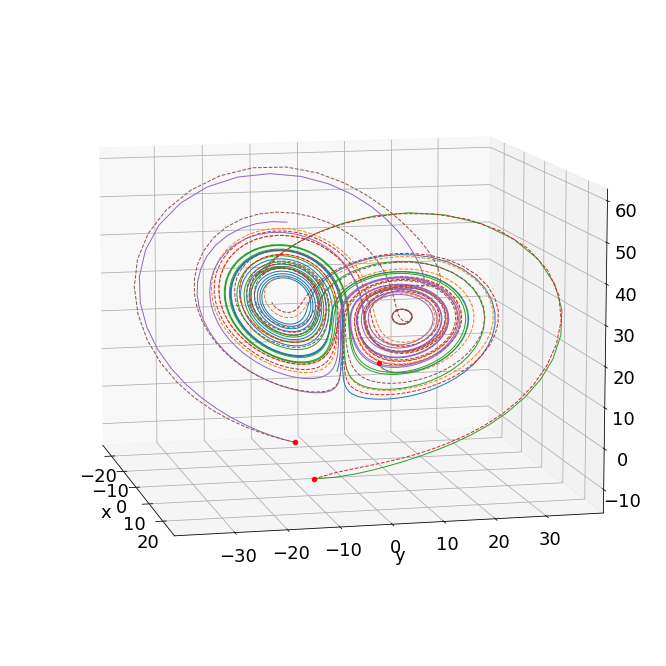

In [8]:
if not 'mymodel' in locals():
    mymodel = deep_approx
np.random.seed(139)
num_traj = 3

nn_flow = np.zeros((num_traj, len(t), 3))
nn_flow[:, 0, :] = -15 + 30 * np.random.random((num_traj, 3))
for jj, tval in enumerate(t[:-1]):                                  # exclude t[-1] due to not t+del_t at t[-1]
    nn_flow[:, jj+1, :] = mymodel.predict(nn_flow[:, jj, :])    # t is row at [jj, 3]
    
x_t = np.array([integrate.odeint(lorenz_deriv, nn_flow[i, 0, :], t) for i in range(num_traj)])
#x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
#                  for x0_j in x0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j in range(num_traj):
    x, y, z = x_t[j, :, :].T
    xd, yd, zd = nn_flow[j, :, :].T                                  # xd for deep-approx
    ax.plot(x, y, z, linewidth=1)
    ax.plot(xd, yd, zd, '--', lw=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.scatter(x[0], y[0], z[0], color='r')
    
ax.view_init(10, -13)
plt.show()
    

(801,)


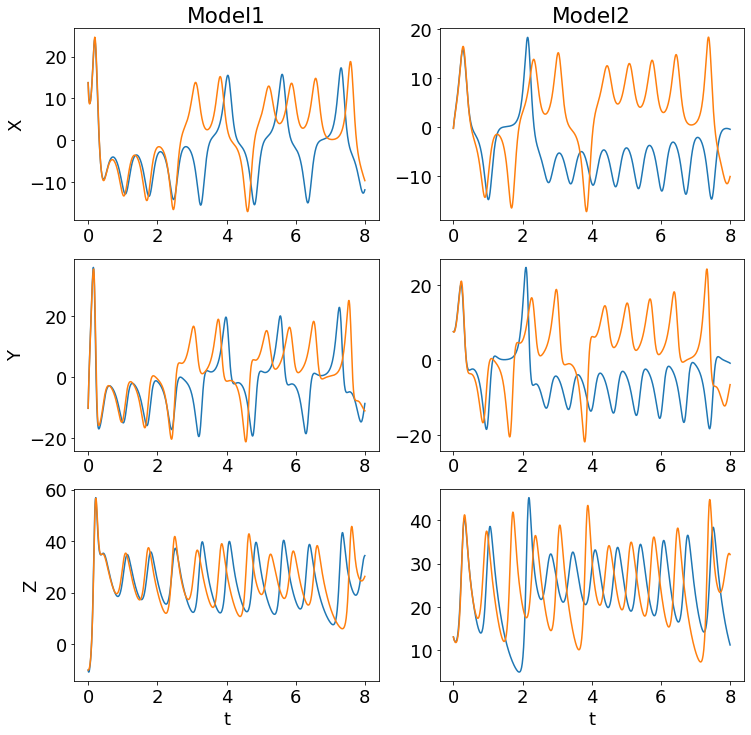

In [9]:
### trajectory component
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12,12))
gs  = gridspec.GridSpec(3,2, height_ratios=[1,1,1] )
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[2,0])
ax4 = plt.subplot(gs[0,1])
ax5 = plt.subplot(gs[1,1])
ax6 = plt.subplot(gs[2,1])
subaxes = [[ax1, ax4], [ax2, ax5], [ax3, ax6]]

### select 

for j in range(2):
    x, y, z = x_t[j, :, :].T
    xd, yd, zd = nn_flow[j, :, :].T 
        
    subaxes[0][j-1].plot(t, x, t, xd)
    subaxes[1][j-1].plot(t, y, t, yd)
    subaxes[2][j-1].plot(t, z, t, zd)
ax1.set_title('Model1')
ax1.set_ylabel('X')
ax2.set_ylabel('Y')
ax3.set_ylabel('Z')
ax3.set_xlabel('t')
ax4.set_title('Model2')
ax6.set_xlabel('t')
print(x.shape)   
plt.show()
